## Import necessary libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import img_to_array, load_img
import numpy as np
import matplotlib.pyplot as plt


## Define the path to your image

In [2]:
image_path = '/content/polar02.jpg'

## Create an ImageDataGenerator with augmented image transformations


In [3]:

rotation_datagen = ImageDataGenerator(
    rotation_range=40,             # Degree range for random rotations
    width_shift_range=0.2,         # Fraction of total width for horizontal shift
    height_shift_range=0.2,        # Fraction of total height for vertical shift
    shear_range=0.2,               # Shear angle in radians
    zoom_range=0.2,                # Random zoom range
    horizontal_flip=True,          # Randomly flip images horizontally
    fill_mode='nearest')            # Fill mode for newly created pixels

## Function to add Gaussian noise to an image

In [4]:
def add_gaussian_noise(image):
    noise = tf.random.normal(shape=tf.shape(image), mean=0, stddev=0.5, dtype=tf.float32)
    noisy_image = image + noise
    return tf.clip_by_value(noisy_image, 0, 255)

## Create an ImageDataGenerator for blur with Gaussian noise

In [5]:
blur_datagen = ImageDataGenerator(
    preprocessing_function=add_gaussian_noise,
    zoom_range=0.2,
    fill_mode='nearest')

## Create an ImageDataGenerator for darker variations

In [6]:
darker_datagen = ImageDataGenerator(
    brightness_range=(0.5, 1.0),
    zoom_range=0.2,                # Random zoom range
    horizontal_flip=True,          # Randomly flip images horizontally
    fill_mode='nearest')

## Load the original image


In [7]:
img = load_img(image_path)

## Convert the image to a numpy array and  Add an extra dimension for the batch


In [8]:
img_array = img_to_array(img)
img_array = img_array.reshape((1,) + img_array.shape)

## Parameters for displaying the generated images


In [9]:
num_generated_images = 20
save_dir = '/content/drive/MyDrive/Colab Notebooks/Bear/generate'

## Create a grid layout with custom spacing


In [10]:
num_rows = 5
num_cols = 4
spacing = 0.5

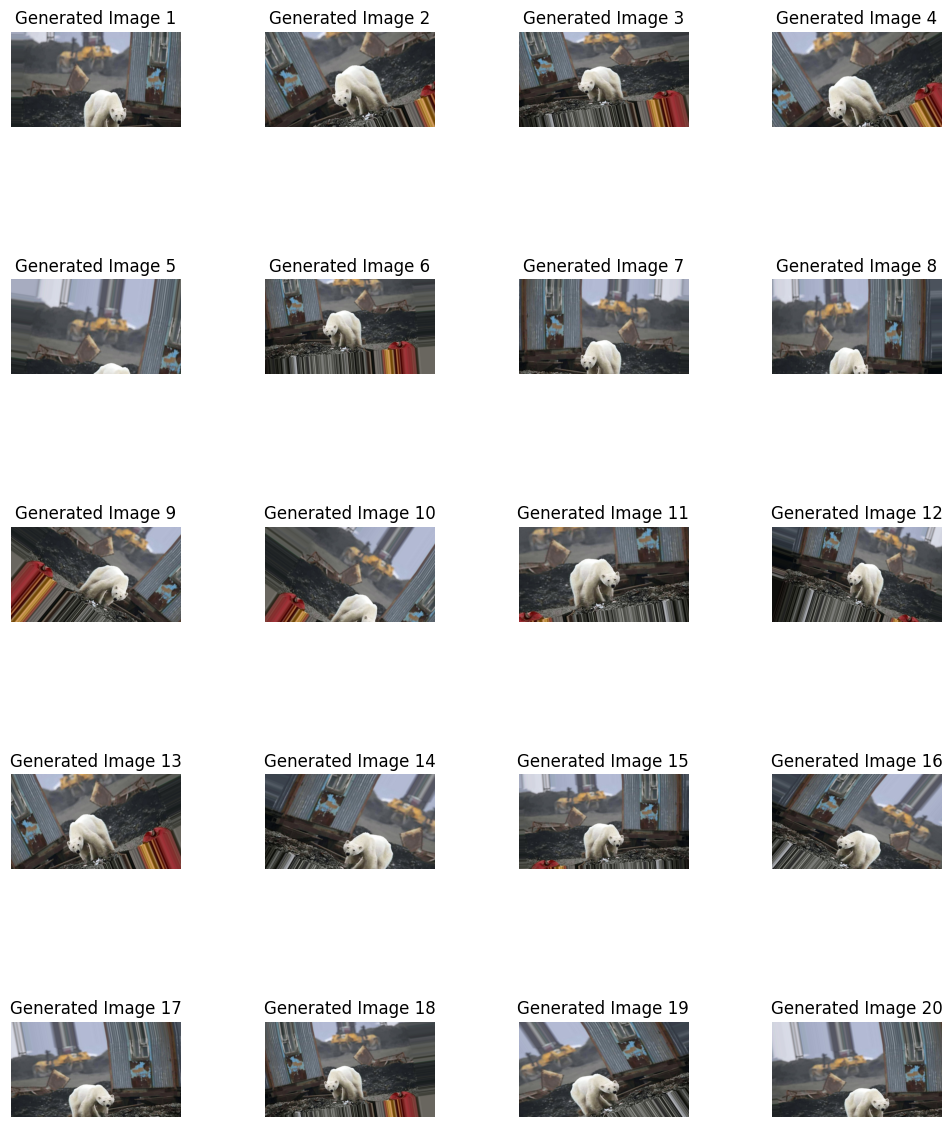

In [11]:
# Initialize a counter for the generated images
i = 0

fig = plt.figure(figsize=(12, 15))
grid = plt.GridSpec(num_rows, num_cols, wspace=spacing, hspace=spacing)

# Loop through the augmented images generated by rotation_datagen
for batch in rotation_datagen.flow(img_array, batch_size=1, save_to_dir=save_dir,
                         save_prefix='polar', save_format='jpg'):
    # Check if the desired number of images has been generated
    if i < num_generated_images:
        # Calculate the row and column indices for the current image in the grid
        row = i // num_cols
        col = i % num_cols

        # Add a subplot to the custom grid layout at the calculated position
        ax = fig.add_subplot(grid[row, col])

        # Display the augmented image in the subplot
        ax.imshow(batch[0].astype(np.uint8))

        # Set a title for the displayed image
        ax.set_title('Generated Image ' + str(i+1))

        # Remove axis labels for a cleaner display
        ax.axis('off')
    else:
        # Exit the loop once the desired number of images is generated
        break
    i += 1


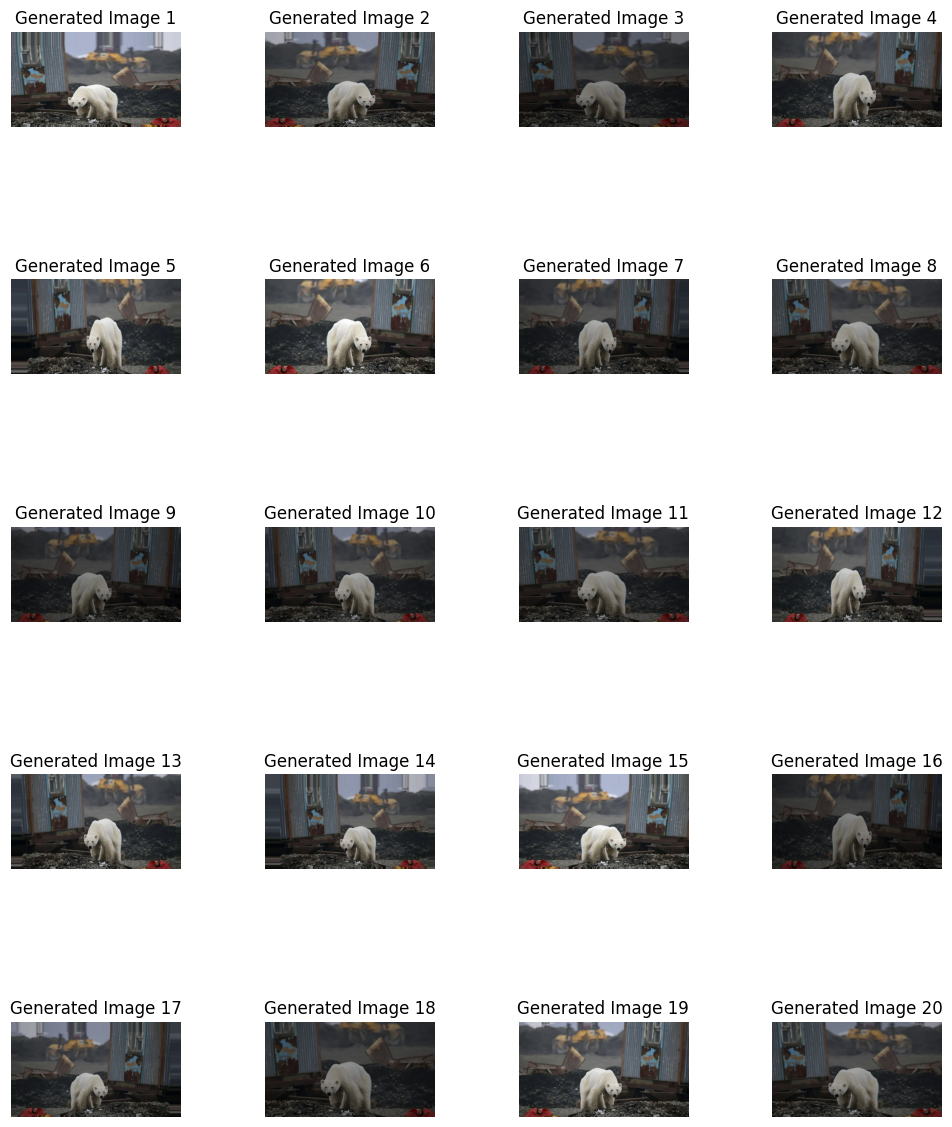

In [12]:
i = 0
fig = plt.figure(figsize=(12, 15))
grid = plt.GridSpec(num_rows, num_cols, wspace=spacing, hspace=spacing)
for batch in darker_datagen.flow(img_array, batch_size=1, save_to_dir=save_dir,
                                save_prefix='darker_polar', save_format='jpg'):
    if i < num_generated_images:
        row = i // num_cols
        col = i % num_cols
        ax = fig.add_subplot(grid[row, col])
        ax.imshow(batch[0].astype(np.uint8))
        ax.set_title('Generated Image ' + str(i+1))
        ax.axis('off')

    else:
        break
    i += 1

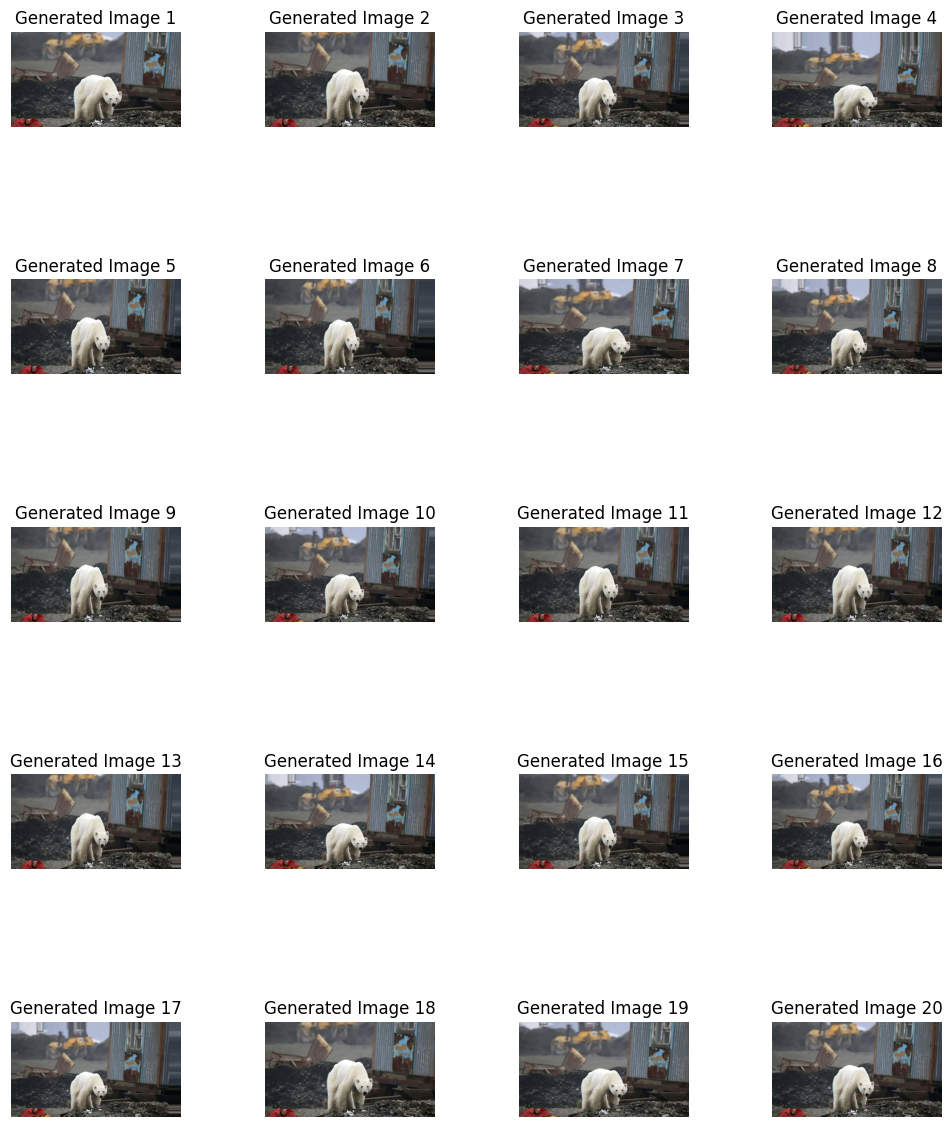

In [13]:
i = 0
fig = plt.figure(figsize=(12, 15))
grid = plt.GridSpec(num_rows, num_cols, wspace=spacing, hspace=spacing)
for batch in blur_datagen.flow(img_array, batch_size=1, save_to_dir=save_dir,
                                save_prefix='blur_polar', save_format='jpg'):
    if i < num_generated_images:
        row = i // num_cols
        col = i % num_cols
        ax = fig.add_subplot(grid[row, col])
        ax.imshow(batch[0].astype(np.uint8))
        ax.set_title('Generated Image ' + str(i+1))
        ax.axis('off')

    else:
        break
    i += 1

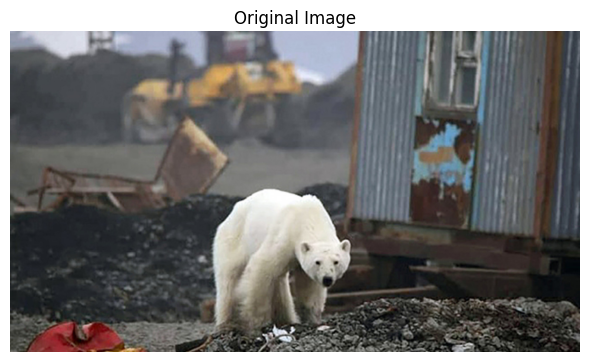

In [14]:
# Display the original image separately
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')
plt.tight_layout()
plt.show()